# Algar Kamaji

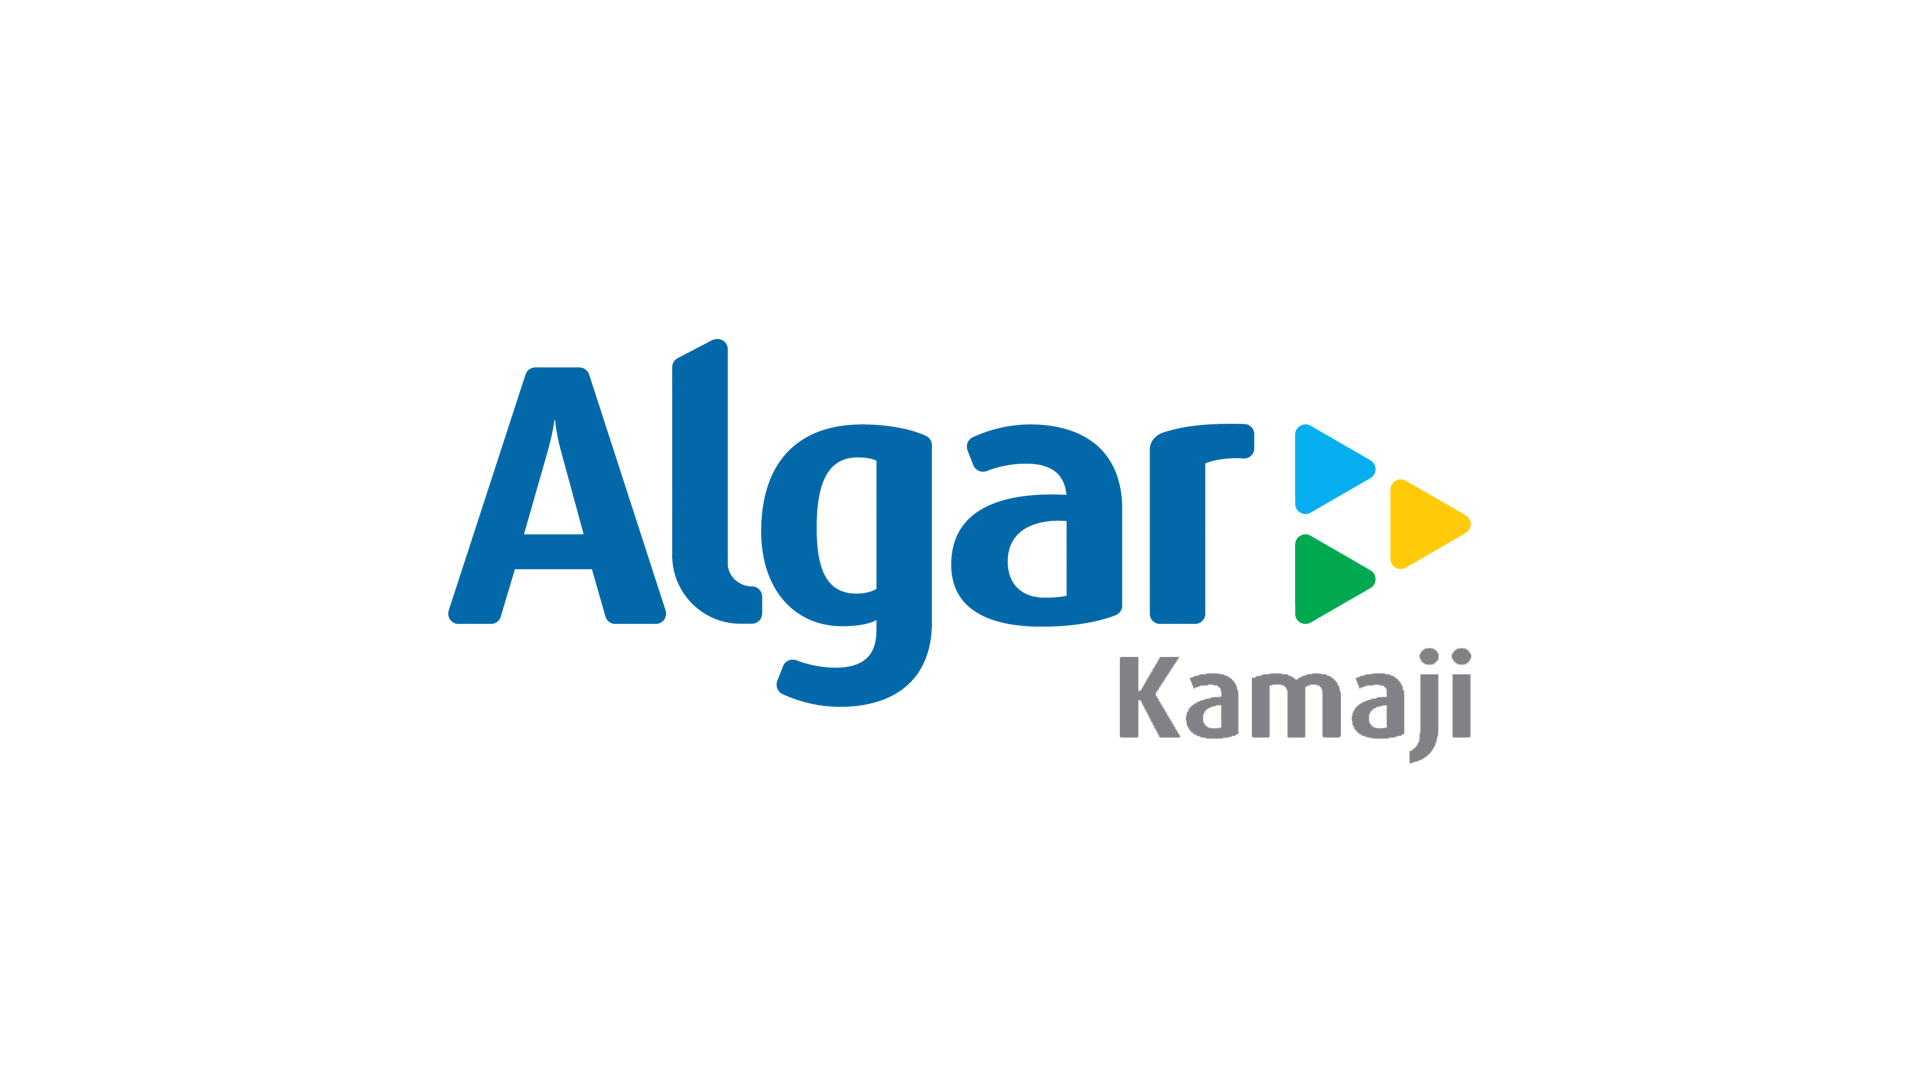

In [1]:
from IPython.display import Image
Image("Kamaji.png")

In [2]:
import pandas as pd
import pandas_datareader.data as web
df = web.DataReader('BRL=X', 'yahoo')
print df

              Open    High     Low   Close  Adj Close  Volume
Date                                                         
2010-01-04  1.6930  1.7412  1.6723  1.7190     1.7190     0.0
2010-01-05  1.6713  1.7370  1.6713  1.7370     1.7370     0.0
2010-01-06  1.6798  1.7359  1.6798  1.7315     1.7315     0.0
2010-01-07  1.7242  1.7472  1.6805  1.7389     1.7389     0.0
2010-01-08  1.6954  1.7492  1.6954  1.7320     1.7320     0.0
2010-01-11  1.6765  1.7330  1.6765  1.7310     1.7310     0.0
2010-01-12  1.6870  1.7456  1.6870  1.7373     1.7373     0.0
2010-01-13  1.6959  1.7485  1.6959  1.7459     1.7459     0.0
2010-01-14  1.7080  1.7698  1.7080  1.7641     1.7641     0.0
2010-01-15  1.7085  1.7704  1.7085  1.7644     1.7644     0.0
2010-01-18  1.7312  1.7737  1.7215  1.7633     1.7633     0.0
2010-01-19  1.7100  1.7786  1.7100  1.7742     1.7742     0.0
2010-01-20  1.7215  1.7904  1.7215  1.7895     1.7895     0.0
2010-01-21  1.7405  1.8032  1.7395  1.8008     1.8008     0.0
2010-01-

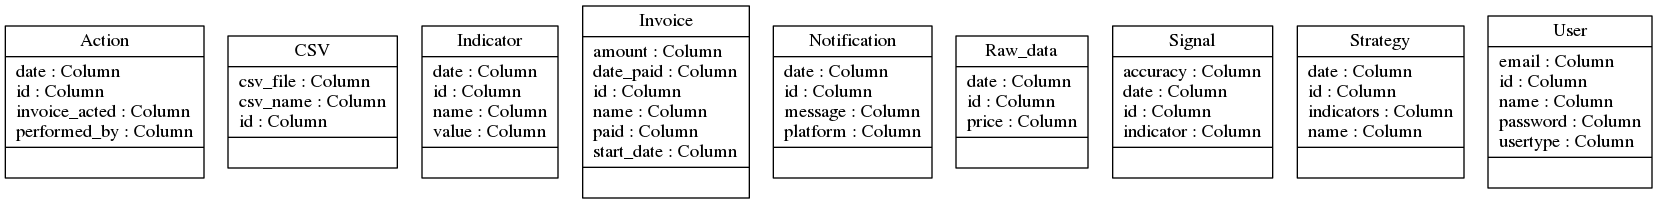

In [3]:
Image("classes_Model.png")

# Indicators data

In [4]:
from stockstats import StockDataFrame
df.to_csv('brlusd.csv', mode='w', header=True)
data = StockDataFrame.retype(pd.read_csv('brlusd.csv'))
macdh = data['macdh']
print macdh[-1]

-0.00192227151429


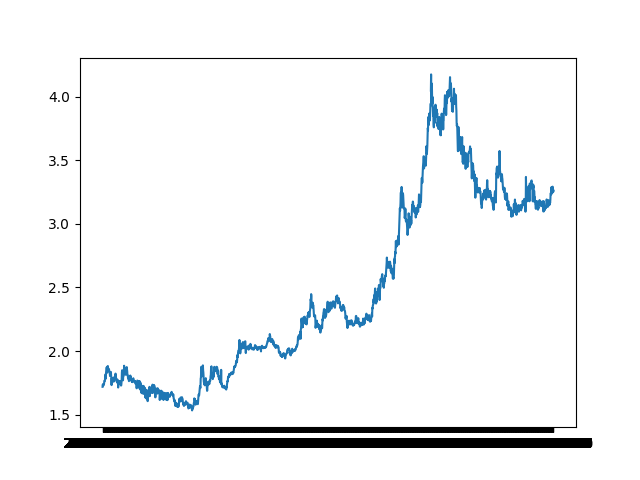

In [5]:
Image("close_price.png")

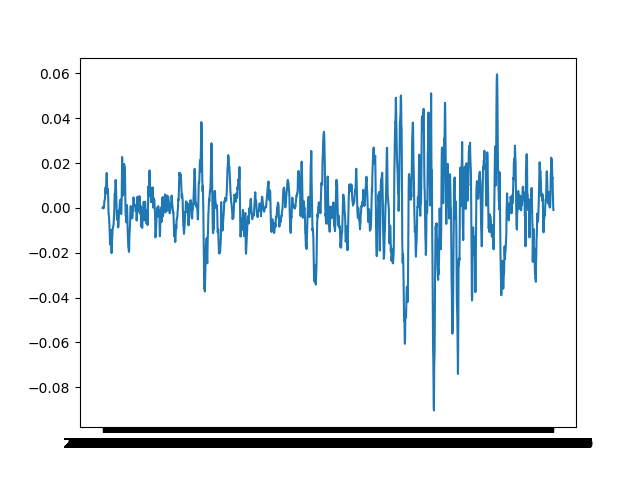

In [6]:
Image("macd_histogram.png")

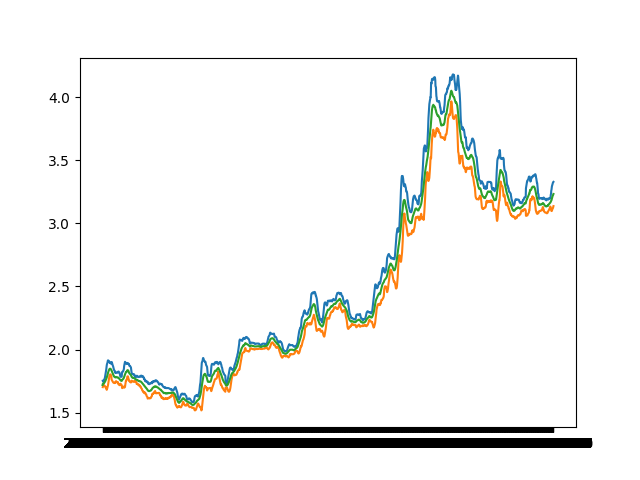

In [7]:
Image("bollinger_bands.png")

# Standardizing the latest datapoints

In [8]:
macdh_standard_deviation = macdh.std()
macdh_mean = macdh.mean()
macdh_distance = macdh[-1] - macdh_mean
macdh_standardized = macdh_distance / macdh_standard_deviation

print "Latest Macd Histogram : " + str(macdh[-1])
print "Macd Histogram Standard deviation : " + str(macdh_standard_deviation)
print "Macd Histogram Mean : " + str(macdh_mean)
print "Macd Histogram Standardized : " + str(macdh_standardized)

Latest Macd Histogram : -0.00192227151429
Macd Histogram Standard deviation : 0.0156753707678
Macd Histogram Mean : 0.0001028253377
Macd Histogram Standardized : -0.129189725844


# Signals and Storing Data

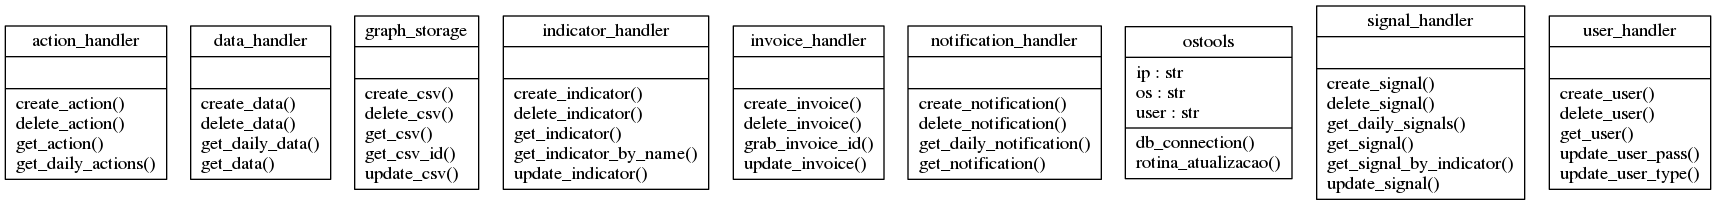

In [9]:
Image("classes_Auxiliary.png")

In [10]:
import auxiliary
os_tools = auxiliary.ostools()
session = os_tools.db_connection()
indicator_handler = auxiliary.indicator_handler()

close = data['close'][-1]
bollinger_lb = indicator_handler.get_indicator_by_name(session, 'bollinger_low')

print close
print bollinger_lb.value

3.2618
3.13640361579


In [11]:
signal_handler = auxiliary.signal_handler()
macdh_indicator = indicator_handler.get_indicator_by_name(session, 'macd_histogram')
# 0.2 = Peso definido na estratégia, default 1/3 STD
if macdh[-1] > 0 and macdh_standardized > 0.33:
    macdh_signal = signal_handler.create_signal(session, macdh_indicator.id, macdh[-1])
else:
    macdh_signal = False



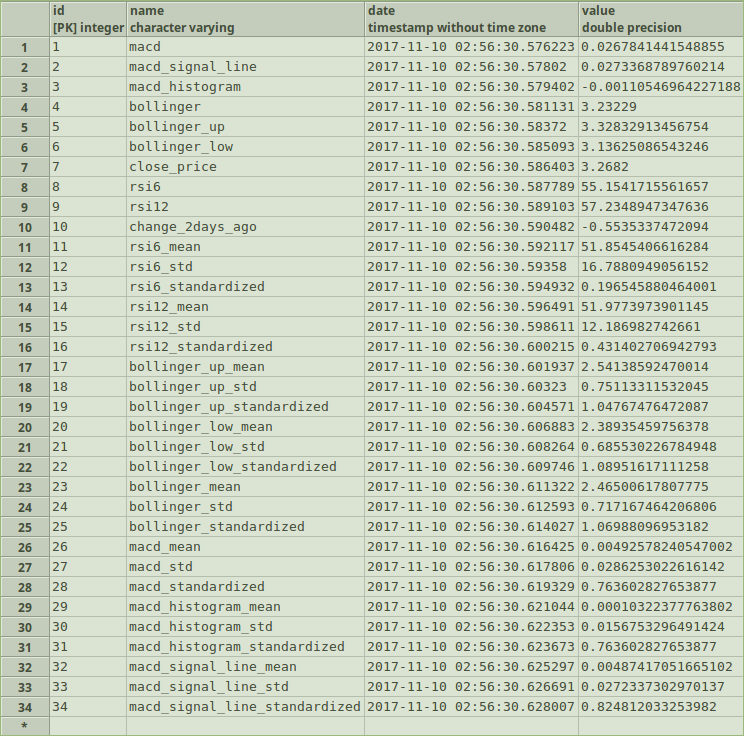

In [12]:
Image("pgadmin.png")

# Defining a signal strategy for notifications

In [15]:
strategy_handler = auxiliary.strategy_handler()
#Definindo os macdh signal parameters in this strategy

#create_strategy(days_past, relevance)
macdh_strategy = strategy_handler.create_strategy(session, macdh_indicator.id, 2, 0.5)

#Criar para cada um dos sinais
print macdh_strategy.days_past
print macdh_strategy.accuracy
print macdh_strategy.indicator

2
0.5
3
